In [5]:
%load_ext autoreload
%load_ext iminizinc
%matplotlib inline
%autoreload 2
from z3 import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The iminizinc extension is already loaded. To reload it, use:
  %reload_ext iminizinc


In [13]:
def read_input(path):
    file = open(path,"r").readlines()
    w_paper , h_paper = tuple(map(int,file[0].rstrip("\n").split(" ")))
    n = int(file[1].rstrip("\n"))
    presents = []
    for i in range(2,n+2):
        presents.append(list(map(int,file[i].rstrip("\n").split(" "))))
    return w_paper,h_paper,n,presents

In [30]:
path = "instances/8x8.txt"
w_paper, h_paper, n, presents = read_input(path)
bl_corners = []
presents

[[3, 3], [3, 5], [5, 3], [5, 5]]

In [47]:
%%mzn_model test
include "globals.mzn";
int: w_paper;
int: h_paper;
int: n;
array[1..n,1..2] of var 0..max(w_paper,h_paper)-1: bl_corners;
array[1..n,1..2] of int: presents;
constraint forall(i in 1..n)(bl_corners[i,1]+presents[i,1]<=w_paper);
constraint forall(i in 1..n)(bl_corners[i,2]+presents[i,2]<=h_paper);
constraint forall(i in 1..n,j in i+1..n)(
    max(bl_corners[i,1],bl_corners[j,1])>=min(bl_corners[i,1]+presents[i,1],bl_corners[j,1]+presents[j,1]) \/
    max(bl_corners[i,2],bl_corners[j,2])>=min(bl_corners[i,2]+presents[i,2],bl_corners[j,2]+presents[j,2])
    );
solve satisfy;

In [46]:
def z3max(x,y):
    return If(x > y, x, y)

def z3min(x,y):
    return If(x < y, x, y)

bl_corners= [ [ Int("c_%s_%s" % (i, j)) for j in range(2) ] for i in range(n) ]
domain = [And(0<=bl_corners[i][0],bl_corners[i][0]<w_paper,0<=bl_corners[i][1],bl_corners[i][1]< h_paper) for i in range(n)]
overflow = [And(bl_corners[i][0]+presents[i][0]<=w_paper,bl_corners[i][1]+presents[i][1]<=h_paper) for i in range(n)]
pp(bl_corners)
intersection = [ And(
    Or(
        z3max(bl_corners[i][0],bl_corners[j][0])>=z3min(bl_corners[i][0]+presents[i][0],bl_corners[j][0]+presents[j][0]),
        z3max(bl_corners[i][1],bl_corners[j][1])>=z3min(bl_corners[i][1]+presents[i][1],bl_corners[j][1]+presents[j][1])
     )) for i in range(n) for j in range(i+1,n) ]

s = Solver()
s.add(domain + overflow + intersection)
s.check()
sol = s.model()
solution=[[sol[bl_corners[i][0]],sol[bl_corners[i][1]]] for i in range(n)]
solution

[[c_0_0, c_0_1],
 [c_1_0, c_1_1],
 [c_2_0, c_2_1],
 [c_3_0, c_3_1]]


[[5, 5], [5, 0], [0, 0], [0, 3]]

Number of solutions= 12 


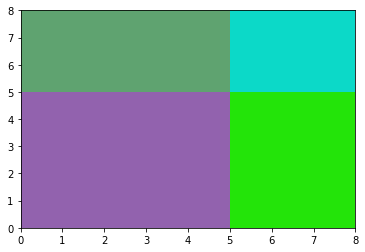

[[5, 5], [5, 0], [0, 5], [0, 0]]


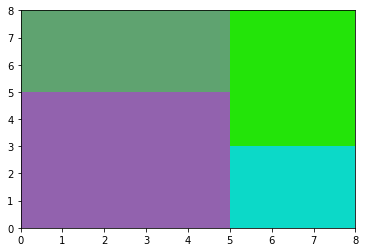

[[5, 0], [5, 3], [0, 5], [0, 0]]


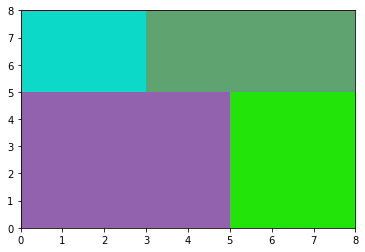

[[0, 5], [5, 0], [3, 5], [0, 0]]


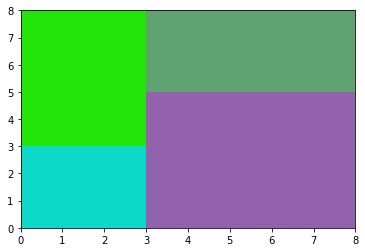

[[0, 0], [0, 3], [3, 5], [3, 0]]


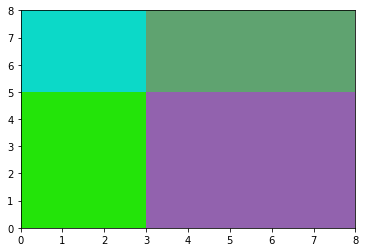

[[0, 5], [0, 0], [3, 5], [3, 0]]


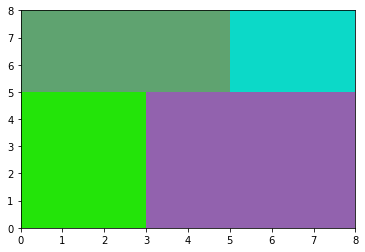

[[5, 5], [0, 0], [0, 5], [3, 0]]


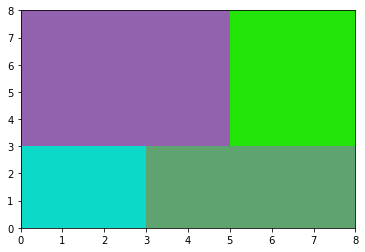

[[0, 0], [5, 3], [3, 0], [0, 3]]


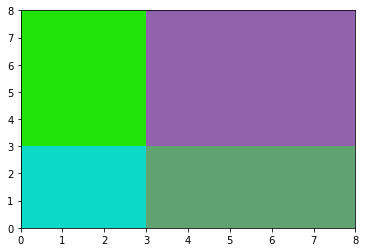

[[0, 0], [0, 3], [3, 0], [3, 3]]


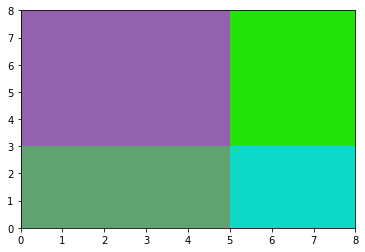

[[5, 0], [5, 3], [0, 0], [0, 3]]


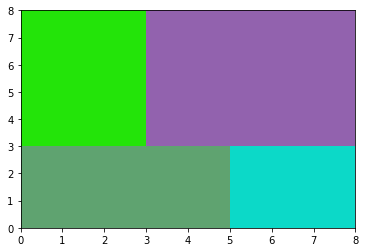

[[5, 0], [0, 3], [0, 0], [3, 3]]


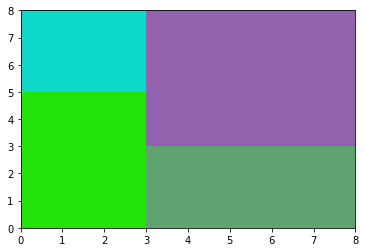

[[0, 5], [0, 0], [3, 0], [3, 3]]


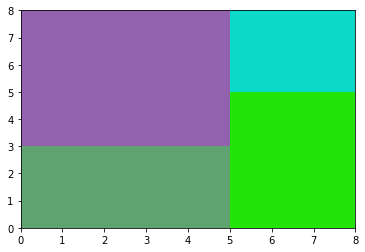

[[5, 5], [5, 0], [0, 0], [0, 3]]


In [49]:
def show_solutions(w_paper,h_paper,n,presents,solutions):
    colours = np.random.rand(n,3)
    for x in solutions:
        bl_corners = x['bl_corners']
        show_solution(w_paper,h_paper,n,presents,bl_corners,colours)

def show_solution(w_paper,h_paper,n,presents,bl_corners,colours=None):
    fig, ax = plt.subplots()
    if colours is None:
        colours = np.random.rand(n,3)
    for i in range(n):
        ax.add_patch(patches.Rectangle(bl_corners[i],presents[i][0],presents[i][1],label=i,facecolor=colours[i],lw=4))
    ax.set_xlim(0, w_paper)
    ax.set_ylim(0, h_paper)
    plt.show()
    print(bl_corners)

solutions = %minizinc -a test
print(f"Number of solutions = {len(solutions)} ")
show_solutions(w_paper,h_paper,n,presents,solutions)

In [116]:
constraint forall(i in 1..n,j in i+1..n)(not( bl_corners[j,1]==bl_corners[i,1] /\ bl_corners[j,2]==bl_corners[i,2]));

constraint forall(i in 1..n,j in i+1..n)(if bl_corners[j,1]>bl_corners[i,1] then bl_corners[j,1]>=bl_corners[i,1]+presents[i,1] else true endif /\ if bl_corners[j,2]>bl_corners[i,2] then bl_corners[j,2]>=bl_corners[i,2]+presents[i,2] else true endif);

SyntaxError: invalid syntax (<ipython-input-116-095f6cebe787>, line 1)